In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Getting The Data

In [5]:
#mnist is the dataset craeted by tensorflow
mnist = tf.keras.datasets.mnist # 28 x 28 images of handwritten digits 0-9

In [6]:
#splitting the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

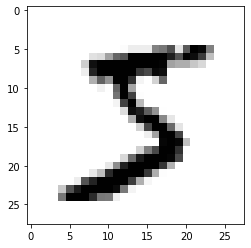

In [7]:
#shows the first digit in x_train
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [8]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Normalizing The Data

In [9]:
# normalising the data 
''' Right now the data ranges from 0 - 255 so now we will normalise it to 0-1
    we are putting all the data on the same scale'''
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
''' when you normalize in axis = 1  (columns) you could get the right scale considering all 
    the values in the pixel location pixel 1 is compared to pixel 1 of all the images, 
    which is done on the WHOLE dataset so the normalization is balanced throughout the data to a certain point.'''

' when you normalize in axis = 1  (columns) you could get the right scale considering all \n    the values in the pixel location pixel 1 is compared to pixel 1 of all the images, \n    which is done on the WHOLE dataset so the normalization is balanced throughout the data to a certain point.'

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Building The Model

In [11]:
#building the model
model = tf.keras.models.Sequential() # we are using squential model because there is only one input layer and one output layer
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #Hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2654 - accuracy: 0.9230
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1085 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0728 - accuracy: 0.9779


In [12]:
# evaluating loss and accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)

print(val_loss, val_acc)

313/313 [==============================] - 0s 802us/step - loss: 0.0881 - accuracy: 0.9726
0.08813948929309845 0.972599983215332


In [13]:
predictions = model.predict([x_test])

313/313 [==============================] - 0s 673us/step


In [14]:
predictions

array([[4.0700687e-08, 2.1819840e-06, 1.2487343e-05, ..., 9.9967611e-01,
        1.7505965e-06, 2.6090356e-06],
       [7.5278788e-09, 4.3506306e-02, 9.5640248e-01, ..., 1.4594134e-08,
        3.2945098e-07, 6.9211518e-11],
       [1.6331542e-08, 9.9984992e-01, 2.6335397e-06, ..., 9.6917493e-06,
        6.6881425e-05, 1.3032902e-06],
       ...,
       [4.2656062e-10, 1.1774336e-07, 4.5859587e-09, ..., 1.4647832e-06,
        1.0690298e-06, 3.4708934e-04],
       [3.8507860e-06, 9.2773553e-06, 2.7114174e-07, ..., 3.0136805e-06,
        3.5161178e-03, 1.9553434e-06],
       [1.7511107e-07, 1.5826854e-10, 1.4106166e-08, ..., 6.5236157e-13,
        5.0185562e-08, 8.0248516e-11]], dtype=float32)

# Testing the model

In [15]:
import numpy as np

print(np.argmax(predictions[0])) # predictig the digit

7


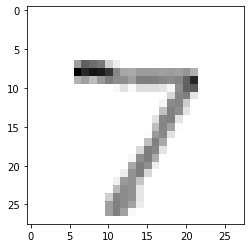

In [16]:
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()

In [17]:
print(np.argmax(predictions[1]))

2


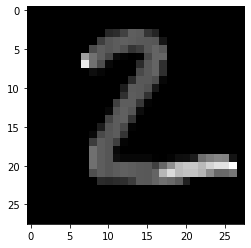

In [18]:
plt.imshow(x_test[1],cmap='gray')
plt.show()